In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from random import normalvariate
from numpy.linalg import inv, qr
rng = np.random.default_rng(seed=12345)

rng = np.random.default_rng(seed=12345)
seed是种子的意思，是一个拟定的特定值，设置了一个种子值后，随机数生成器会根据这个种子值开始生成一系列伪随机数。如果你每次都使用同一个种子值，随机数生成器将会产生相同的序列的随机数
设立种子数的意义：
1.在模拟实验或测试中，你可能需要重复相同的随机数序列，以便在不同运行之间进行比较。设置一个固定的种子值可以确保这一点。
2.在游戏开发中，你可能希望每次玩家的游戏体验都是相同的，或者至少在某些方面保持一致。通过设置相同的种子值，你可以实现这一点。
3.在数据分析中，你可能需要在多次运行相同算法时得到相同的结果，以便进行可靠的比较和验证。设置种子值可以确保这一点。
4.在机器学习中，当你需要在一个批次中多次运行模型时，你可能希望得到相同的随机权重初始化，以便批次内的结果是一致的。设置种子值可以帮助实现这一点。
在现在的环境中需要每次都相同序列的随机数才设定的seed为12345

In [2]:
#线代  dot函数
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1., 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [3]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [4]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [5]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y)等价于np.dot(x, y)，是2✖️3与3✖️2的矩阵相乘，最终是2✖️2的矩阵

In [14]:
#二维数组跟一个大小合适的一维数组的矩阵点积运算会得到一维数组
#x
x @ np.ones(3)

array([ 6., 15.])

@ 运算符用于矩阵乘法，也称为点积。
x 是一个 2x3 的矩阵，形状是 (2, 3)
np.ones(3) 是一个一维数组，形状是 (3,)
一维数组在做矩阵乘法时会被认定为列向量
np.ones(3) 有 3 个元素，等价于一个形状为 (3, 1) 的列向量。
所以2x3 与 3x1 的矩阵相乘为 2x1 的矩阵，即将x中的每行相加，最后得到[6, 15]

In [15]:
#为证明np.ones()的用法
test = np.ones(3)
test

array([1., 1., 1.])

In [16]:
test1 = np.ones((3, 1))
#三行一列
test1

array([[1.],
       [1.],
       [1.]])

In [17]:
x @ test1

array([[ 6.],
       [15.]])

x @ np.ones((3, 1)) 与 x @ np.ones(3) 的结果在形状上是不同的，但在数值上是相同的。
x @ np.ones(3):
x 是一个 (2, 3) 形状的矩阵。
np.ones(3) 是一个 (3,) 形状的一维数组。
矩阵乘法结果是一个形状为 (2,) 的一维数组。

x @ np.ones((3, 1)):
x 仍然是一个 (2, 3) 形状的矩阵。
np.ones((3, 1)) 是一个 (3, 1) 形状的二维列向量。
矩阵乘法结果是一个形状为 (2, 1) 的二维数组。

两个数值相同，但形状不同，一个是一维数组，一个是二维数组

In [50]:
#numpy.linalg中有一组标准的矩阵分解运算以及求逆和求行列式方法：
rng = np.random.default_rng(seed=12345)
X = rng.standard_normal((5, 5))
mat = X.T @ X

In [51]:
mat

array([[ 9.83867527,  1.04334204,  0.24651754,  0.04017965,  0.16391486],
       [ 1.04334204,  5.11794735, -3.98521413,  0.99264687,  3.27464142],
       [ 0.24651754, -3.98521413,  4.15026075, -2.41299778, -2.74788646],
       [ 0.04017965,  0.99264687, -2.41299778,  3.97263789, -0.04472489],
       [ 0.16391486,  3.27464142, -2.74788646, -0.04472489,  6.01956209]])

In [52]:
inv(mat)

array([[ 0.15548538, -0.36723081, -0.52638547, -0.2300642 , -0.04646089],
       [-0.36723081,  2.54917814,  3.47827334,  1.48196722,  0.22206454],
       [-0.52638547,  3.47827334,  5.46389554,  2.46214396,  0.63467543],
       [-0.2300642 ,  1.48196722,  2.46214396,  1.38302896,  0.33430132],
       [-0.04646089,  0.22206454,  0.63467543,  0.33430132,  0.33879566]])

成一个5x5的矩阵X，其中包含从标准正态分布（均值为0，方差为1）中抽取的随机数。
然后，您想要计算矩阵X的转置X.T与矩阵X的乘积，接着求得该乘积的逆矩阵。
inv函数是要求矩阵的逆矩阵，具体用法为numpy.linalg.inv(a)

In [49]:
#为了验证inv(mat)是mat的逆矩阵
mat @ inv(mat)

array([[ 1.00000000e+00,  2.21850121e-16, -1.69485486e-16,
         1.69587246e-16, -1.96317601e-17],
       [ 1.60901152e-16,  1.00000000e+00,  9.88009619e-16,
        -6.00171811e-16, -4.67042211e-16],
       [-1.05685721e-16, -4.58539906e-16,  1.00000000e+00,
        -5.98139876e-17,  3.00070289e-16],
       [-2.38572202e-16,  9.90852676e-16,  2.03861339e-15,
         1.00000000e+00,  3.28769669e-16],
       [-1.60460765e-20, -4.35123959e-16,  8.16184502e-16,
        -3.70787804e-16,  1.00000000e+00]])

In [53]:
#求出来并不是E矩阵，判断矩阵是否可逆：
rank = np.linalg.matrix_rank(mat)
if rank == mat.shape[0]:
    print("可逆")
else:
    print("不可逆")

可逆


In [54]:
mat @ inv(mat)

array([[ 1.00000000e+00,  2.21850121e-16, -1.69485486e-16,
         1.69587246e-16, -1.96317601e-17],
       [ 1.60901152e-16,  1.00000000e+00,  9.88009619e-16,
        -6.00171811e-16, -4.67042211e-16],
       [-1.05685721e-16, -4.58539906e-16,  1.00000000e+00,
        -5.98139876e-17,  3.00070289e-16],
       [-2.38572202e-16,  9.90852676e-16,  2.03861339e-15,
         1.00000000e+00,  3.28769669e-16],
       [-1.60460765e-20, -4.35123959e-16,  8.16184502e-16,
        -3.70787804e-16,  1.00000000e+00]])

为什么相乘后还不是E矩阵？下面自己做个测试，用一个2✖️2的简单矩阵做测试

In [61]:
omg = np.random.default_rng(seed=12138)
Y = omg.standard_normal((2, 2))
Y

array([[-0.42362502,  0.58177077],
       [-0.78045105,  0.64427673]])

In [62]:
Y @ inv(Y)

array([[ 1.00000000e+00, -2.52189111e-18],
       [ 1.33439566e-16,  1.00000000e+00]])

In [57]:
mbt = Y.T @ Y

In [59]:
inv(mbt)

array([[22.97302018, 22.84282404],
       [22.84282404, 24.04041819]])

In [63]:
mbt @ inv(mbt)

array([[ 1.00000000e+00, -1.29632889e-15],
       [ 5.86441932e-16,  1.00000000e+00]])

此时，我终于知道为什么了，因为后面的数字没有看到，比如5.86441932e-16，后面的-16
首先，5.86441932是系数，后面的e-16是10的-16次方，也就是小数点左移16位，0.000000000000000586441932，是无限逼近于0的，所以主对角线是1，其余的全为0的E矩阵符合预期

In [64]:
#计算X和它转置X.T的点积
X.T.dot(X)

array([[ 9.83867527,  1.04334204,  0.24651754,  0.04017965,  0.16391486],
       [ 1.04334204,  5.11794735, -3.98521413,  0.99264687,  3.27464142],
       [ 0.24651754, -3.98521413,  4.15026075, -2.41299778, -2.74788646],
       [ 0.04017965,  0.99264687, -2.41299778,  3.97263789, -0.04472489],
       [ 0.16391486,  3.27464142, -2.74788646, -0.04472489,  6.01956209]])

常用的线性代数函数有：

![jupyter](4.14.png)

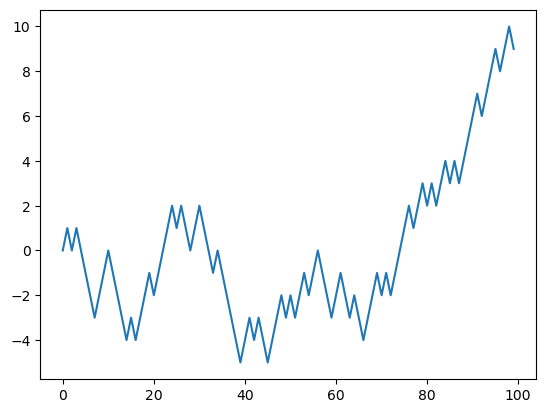

In [67]:
#随机漫步
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

In [ ]:
walk = [position] 是在 Python 中的一种列表初始化方法。
walk是一个变量，被定义为一个列表（list）
这个列表在初始化时包含一个元素，即position
假设 position 是一个已有的变量，它的值会作为列表中的第一个元素。例如：
position = 5
walk = [position]
在这个例子中，walk 将是一个包含数字 5 的列表：
walk = [5]，之后可以对 walk 列表进行各种操作，比如添加、删除元素等。

In [ ]:
而for _ in range(nsteps): 是 Python 中一种常见的循环结构。
它的作用是让循环体的代码执行 nsteps 次
range(nsteps) 生成一个从 0 到 nsteps-1 的序列。这个序列中的每一个数字代表一次循环迭代。
for _ in ...: 是一个 for 循环结构，用于遍历序列中的每一个元素。
这里的 _ 是一个惯例用法，表示循环变量的值不会在循环体内使用。
使用 _ 来表明该变量只是为了满足语法需求，而不会被实际使用。

In [2]:
#walk其实是随机漫步的累积和，可以用一个数组表达式实现。
#
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

walk.min()

-8

In [3]:
walk.max()

50

draws = rng.integers(0, 2, size=nsteps) 
使用随机数生成器 (rng) 生成一个包含随机整数的数组
0, 2：指定了生成随机整数的范围。
整数将在 0（包含）和 2（不包含）之间，因此可能的值是 0 或 1。
size=nsteps：指定了要生成的整数的数量，这里生成一个包含 nsteps 个元素的数组。
生成了一个名为 draws 的数组，数组中包含 nsteps 个随机整数，每个整数要么是 0 要么是 1

steps = np.where(draws == 0, 1, -1)
根据条件对数组 draws 中的每个元素进行判断，并生成一个新的数组 steps
np.where(condition, x, y)
这是NumPy的一个函数，根据condition来选择值。
也就是如果当draws == 0时，steps = 1，反之为-1,并且添加到steps数组中。

In [79]:
#证明steps是一个数组，由np.生成的都是数组，steps是一维数组
#print(steps)

walk = steps.cumsum() 这行代码的作用是计算数组 steps 的累积和，并将结果赋值给 walk
cumsum 是 NumPy 数组的一个方法，表示计算数组元素的累积和，并赋给walk数组
累积和的意思是：对于数组中的每个元素，它是从数组开头到该元素之间所有元素的和。例如，如果 steps 是 [1, -1, 1, 1]，那么它的累积和就是 [1, 0, 1, 2]。
walk中的值就是steps中的值累加起来的，究极随机漫步。

In [87]:
#steps

In [86]:
#walk

In [4]:
trans = np.where(walk > -100, 1 ,0)
trans.sum()

1000

首次穿越时间，随机漫步中第一次到达某个特定时间值的时间。
想要知道随机漫步多久可以初始距离0到10步远（任意方向）
numpy.abs(walk) >= 10可以得到一个bool型数组，表示距离是否可以达到10
想要知道第一个10或者-10的索引，可以用argmx来解决这个问题，
他返回的是该bool型数组最大值的第一个索引（True是第一个最大值）：

In [5]:
(np.abs(walk) >= 10).argmax()

155

abs()函数是取绝对值的意思
np.abs(walk) >= 10:这个条件判断返回一个布尔数组，数组中的每个元素表示 walk 数组中对应位置的绝对值是否大于或等于 10
True 表示条件为真，False 表示条件为假。
argmax()函数是 NumPy 数组的一个方法，返回数组中第一个最大值的索引
在布尔数组中，True 被视为 1，False 被视为 0，argmax() 将返回布尔数组中第一个 True 的索引
walk 数组中第一次绝对值达到或超过 10 的索引位置。如果 walk 中没有任何元素的绝对值达到 10，那么 .argmax() 会返回 0，因为它找不到 True 并默认返回第一个元素的索引。

In [6]:
#多次随机漫步
nwalks = 5000      #5000 次随机游走
nsteps = 1000      #每次随机1000步
#生成一个形状为 (5000, 1000) 的数组，包含 0 和 1 之间的随机整数。
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)          #如果draws大于0则替换为1，反之为-1       
walks = steps.cumsum(axis=1)         #计算 steps 数组沿着列方向（axis=1）的累积和
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [7]:
walks.max()

114

In [8]:
walks.min()

-120

integers 是 NumPy 中 Generator 对象的一个方法，用于生成指定范围内的随机整数数组
它是 numpy.random.default_rng() 创建的随机数生成器 (rng) 对象的一部分

rng = np.random.default_rng()  # 创建随机数生成器
random_integers = rng.integers(low, high=None, size=None, dtype=int)
low: （必需）生成随机整数的下边界（包含）。也可以是负数。
high: （可选）生成随机整数的上边界（不包含）。如果不提供此参数，则默认生成的随机整数在 [0, low) 范围内。
size: （可选）生成随机整数的输出形状。可以是一个整数，表示生成多少个随机数；也可以是一个元组，表示生成数组的形状。如果未提供，返回单个整数。
dtype: （可选）生成整数的类型，默认是 int。可以是 int32、int64 等。

rng = np.random.default_rng()
random_int = rng.integers(1, 10)  # 生成一个 [1, 10) 范围内的随机整数
print(random_int)

rng = np.random.default_rng()
random_array = rng.integers(10, size=5)  # 生成 5 个 [0, 10) 范围内的随机整数
print(random_array)

本题中是生成一个0～2的随机数，也就是0，1之间随机生成一个值，大小是5000✖️1000的二维数组

In [ ]:
axis=1 其实是指 横轴，即沿着数组的 列 方向进行操作
axis=0 则是指 纵轴，即沿着数组的 行 方向进行操作

import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6]])

axis=0 操作：
sum_axis0 = np.sum(arr, axis=0)
print(sum_axis0)  # 输出: [5, 7, 9]

axis=1 操作：
sum_axis1 = np.sum(arr, axis=1)
print(sum_axis1)  # 输出: [6, 15]

axis=0 指的是沿着纵轴（行）进行操作，影响的是列的方向。
axis=1 指的是沿着横轴（列）进行操作，影响的是行的方向。

In [9]:
#对于所有漫步，计算到达30或者-30的最小穿越时间
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True,  True, ...,  True, False,  True])

这里与上面不同，上个例子是一维，现在是二维，且并不是5000次每次都能到30或者-30
any(axis=1) 是在布尔数组中沿着 axis=1（即行的方向）进行操作，检查每一行中是否有至少一个 True 值
如果在某一行中有一个或多个 True，any() 就会返回 True，表示这一行（即该次随机游走）至少有一次达到或超过了 30 的绝对值。

In [11]:
hits30.sum()

3395

In [13]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541])

In [ ]:
walks[hits30]:
hits30 是一个布尔数组，用来筛选那些在某一步中绝对值达到或超过 30 的随机游走
walks[hits30] 会返回一个新的数组，只包含那些在 hits30 为 True 的随机游走
这意味着该数组中的每一行都是至少有一次绝对值达到或超过 30 的随机游走

np.abs(walks[hits30]) >= 30:
计算 walks[hits30] 数组中每个元素的绝对值，并检查这些绝对值是否大于或等于 30，生成一个布尔数组。
这个布尔数组与 walks[hits30] 的形状相同，其中 True 表示在对应位置上，绝对值大于或等于 30。

.argmax(axis=1):
argmax(axis=1) 在布尔数组的每一行上查找第一个 True 的位置索引，这表示该行（即一次随机游走）中首次达到或超过绝对值 30 的步数。
axis=1 指沿着行的方向进行操作，这样每一行会返回一个对应的索引值

最终，crossing_times 是一个一维整数数组，其长度等于 walks[hits30] 的行数
每个元素表示对应随机游走中，第一次达到或超过绝对值 30 的步数（索引）

In [16]:
#平均最小穿越时间
crossing_times.mean()

500.5699558173785

In [17]:
#可以尝试用其他方式得到随机漫步数据，只需要不同的随机数生成器即可，比如standard_normal生成正态分布数组
draws = 0.25 * rng.standard_normal((nwalks, nsteps))